In [106]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns

In [107]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv"
response = requests.get(url)

# saving
with open("laptops.csv", "wb") as file:
    file.write(response.content)

df = pd.read_csv("laptops.csv")
df.head(2)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.0
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.0


In [108]:
#cleaning df
df.columns = df.columns.str.lower().str.replace(' ', '_')

strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['laptop', 'status', 'brand', 'model', 'cpu', 'storage_type', 'gpu', 'touch']

In [109]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head(2)

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.0
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.0


In [110]:
# unique value of each column
for col in df.columns:
    print(col)
    print(df[col].nunique())

laptop
2160
status
2
brand
27
model
121
cpu
28
ram
9
storage
12
storage_type
2
gpu
44
screen
29
touch
2
final_price
1440


In [111]:
# Question 1 

In [112]:
# using only demanded columns
df_selected = df[['ram', 'storage', 'screen', 'final_price']]
for col in df_selected:
    print(col)
    print(df[col].nunique())

# finding which of them has missung values
missing_values = df_selected.isnull().sum()
columns_with_missing = missing_values[missing_values > 0].index.tolist()

print(f"These columns have missing values: {', '.join(columns_with_missing)}")

ram
9
storage
12
screen
29
final_price
1440
These columns have missing values: screen


In [113]:
# Question 2

In [114]:
median_ram  = df_selected['ram'].median()
print(median_ram)

16.0


2160
46


<Axes: xlabel='final_price', ylabel='Count'>

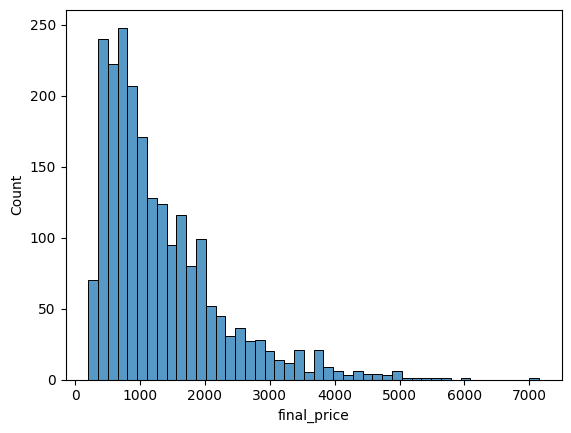

In [115]:
# getting optimal number of bins
n = len(df_selected.final_price)
print(n)

bins = int(np.sqrt(n))
print(bins)
sns.histplot(df.final_price, bins=bins)

In [116]:
# bei sehr schiefer verteilung, oder einzelnen extrem hohen werten
# stellt normalere verteilung her
# für Werte die nahe bei 0 oder negativ 


# looking at the option of log for this df
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [117]:
price_logs = np.log1p(df_selected.final_price)
price_logs

0       6.917706
1       5.703782
2       6.672033
3       7.090077
4       6.507293
          ...   
2155    7.901374
2156    7.972807
2157    8.131822
2158    7.550130
2159    7.438966
Name: final_price, Length: 2160, dtype: float64

<Axes: xlabel='final_price', ylabel='Count'>

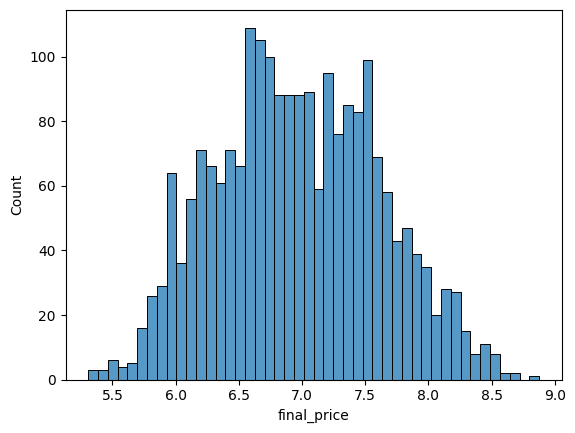

In [118]:
sns.histplot(price_logs, bins=bins)

In [119]:
# see missing values all
df.isnull().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

In [120]:
# prepare and split df with filtered columns
n = len(df_selected) 
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n, n_val, n_test, n_train)

2160 432 432 1296


In [121]:
df_train = df_selected.iloc[:n_train]
df_val = df_selected.iloc[n_train:n_train+n_val]
df_test = df_selected.iloc[n_train+n_val:]

In [122]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [123]:
df_train = df_selected.iloc[idx[:n_train]]
df_val = df_selected.iloc[idx[n_train:n_train+n_val]]
df_test = df_selected.iloc[idx[n_train+n_val:]]

In [124]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [125]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [126]:
y = df['final_price'].values

y_train = (df_train['final_price'].values)
y_val = (df_val['final_price'].values)
y_test = (df_test['final_price'].values)


In [127]:
df_train = df_train.drop(columns=['final_price'])
df_val = df_val.drop(columns=['final_price'])
df_test = df_test.drop(columns=['final_price'])

In [128]:
df_train.head()

,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0
3,16,512,13.3
4,32,1000,16.0


In [129]:
# function for scalar product
def dot(xi, w):
    n = len(xi)
    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [130]:
def linear_regression(xi, w): 
    xi = [1] + xi # Adding bias term (1) to the features
    return dot(xi, w)

In [131]:
# training linear model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [132]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [133]:
# Question 3

In [134]:
# build model
base = ['ram', 'storage', 'screen']

In [135]:
# model with 0 filled
X_train_0 = df_train[base].fillna(0).values
X_val_0 = df_val[base].fillna(0).values

w0_0, w_0 = train_linear_regression(X_train_0, y_train)
y_pred_0 = w0_0 + X_val_0.dot(w_0)

rmse_0 = rmse(y_val, y_pred_0)

rmse_0_rounded = round(rmse_0, 2)
print(f"RMSE (filled with 0): {rmse_0_rounded}")

RMSE (filled with 0): 597.36


In [137]:
# model with mean filled
mean_screen = df_train['screen'].mean()
X_train_mean = df_train[base].fillna(mean_screen).values
X_val_mean = df_val[base].fillna(mean_screen).values

w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

rmse_mean = rmse(y_val, y_pred_mean)

rmse_mean_rounded = round(rmse_mean, 2)
print(f"RMSE (filled with mean): {rmse_mean_rounded}")

RMSE (filled with mean): 600.27


In [380]:
# comparing rmse
if rmse_0_rounded < rmse_mean_rounded:
    print("Filling with 0 gives a better RMSE.")
elif rmse_0_rounded > rmse_mean_rounded:
    print("Filling with mean gives a better RMSE.")
else:
    print("Both options give the same RMSE.")

Filling with 0 gives a better RMSE.


In [381]:
# Question 4

In [139]:
# regularized linear regression (ridge)
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    # regularization term added to XTX
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])  # regularization term
    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

# list of r values
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

# store the best rmse
best_rmse = float('inf')
best_r = None

# iterate through all r values
for r in r_values:
    # train model with regularization, using X filled with 0
    w0, w = train_linear_regression_reg(X_train_0, y_train, r)
    y_pred = w0 + X_val_0.dot(w)
    
    # calculate rmse for the validation set
    rmse_val = rmse(y_val, y_pred)
    
    # print each r value with its corresponding rmse
    print(f"r = {r}: RMSE = {round(rmse_val, 2)}")
    
    # check if this r gives the best result
    if rmse_val == best_rmse and r < best_r:
        best_rmse = rmse_val
        best_r = r

# print best r and corresponding RMSE
print(f"Best r: {best_r}, Best RMSE: {round(best_rmse, 2)}")


r = 0: RMSE = 597.36
r = 0.01: RMSE = 597.36
r = 0.1: RMSE = 597.35
r = 1: RMSE = 597.21
r = 5: RMSE = 597.01
r = 10: RMSE = 597.06
r = 100: RMSE = 597.9
Best r: None, Best RMSE: inf


In [383]:
# Question 5

In [384]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

# list of seeds
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# store rmse values for std calculation
rmse_values = []

# To store the best rmse
best_rmse = float('inf')                          

# iterate through all r values
for seed in seed_values: 
    df_selected = df[['ram', 'storage', 'screen', 'final_price']]
    base = ['ram', 'storage', 'screen']
    
    # 60%/20%/20% split
    n = len(df_selected)
    n_train = int(n * 0.6)
    n_val = int(n * 0.2)
    n_test = n - n_train - n_val

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df_selected.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df_selected.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df_selected.iloc[idx[n_train+n_val:]].reset_index(drop=True)
    
    # fill nas with 0 in training and validation sets
    X_train = df_train[base].fillna(0).values 
    X_val = df_val[base].fillna(0).values

    y_train = df_train['final_price'].values
    y_val = df_val['final_price'].values
    y_test = df_test['final_price'].values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    # train model
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    
    
    # calculate rmse for the validation set
    rmse_val = rmse(y_val, y_pred)

     # round rmse to 2 decimal digits
    rmse_val_rounded = round(rmse_val, 2)

    # print rmse for the current seed
    print(f"Seed {seed}: RMSE = {rmse_val_rounded}")

    # store rmse value for std calculation
    rmse_values.append(rmse_val)
    
    # check if this r gives the best result
    if rmse_val < best_rmse:
        best_rmse = rmse_val
        
    # calculate the standard deviation of rmse values
    std_rmse = np.std(rmse_values)

# Print the best r and corresponding rmse
print(f"Standard deviation of RMSE values: {round(std_rmse, 3)}")


Seed 0: RMSE = 565.45
Seed 1: RMSE = 636.8
Seed 2: RMSE = 588.96
Seed 3: RMSE = 597.81
Seed 4: RMSE = 571.96
Seed 5: RMSE = 573.24
Seed 6: RMSE = 647.34
Seed 7: RMSE = 550.44
Seed 8: RMSE = 587.33
Seed 9: RMSE = 576.1
Standard deviation of RMSE values: 29.176


In [385]:
# Question 6

In [386]:
# prepare and split df with filtered columns
df_selected = df[['ram', 'storage', 'screen', 'final_price']]
base = ['ram', 'storage', 'screen']
n = len(df_selected)  
n_val = int(n * 0.2)  
n_test = int(n * 0.2)  
n_train = n - n_val - n_test  

print(n, n_val, n_test, n_train)  

# shuffle dataset using fixed seed for reproducibility
idx = np.arange(n)  
np.random.seed(9)  
np.random.shuffle(idx)  

# split using the shuffled index
df_train = df_selected.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df_selected.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df_selected.iloc[idx[n_train+n_val:]].reset_index(drop=True)

# prepare target variable for training and validation
y_train = df_train['final_price'].values
y_val = df_val['final_price'].values 
y_test = df_test['final_price'].values

# remove target variable from feature sets
del df_train['final_price']
del df_val['final_price']

# combine training and validation datasets
X_train_val = pd.concat([df_train, df_val]).reset_index(drop=True)  
y_train_val = np.concatenate([y_train, y_val])  

# fill missing values with 0
X_train_val_0 = np.nan_to_num(X_train_val, nan=0)
X_test_0 = np.nan_to_num(df_test.drop(columns=['final_price']), nan=0)  # Ensure final_price is dropped

# train the model with r=0.001
r = 0.001
w0, w = train_linear_regression_reg(X_train_val_0, y_train_val, r)

# make predictions on the test dataset
y_pred_test = w0 + X_test_0.dot(w)  # Predictions in log scale


# calculate rmse for test dataset
y_test_actual = df_test['final_price'].values  # get actual final price for test dataset
rmse_test = rmse(y_test_actual, y_pred_test)  # calculate rmse using original values

# output rmse
print(f"RMSE on the test dataset: {round(rmse_test, 2)}")


2160 432 432 1296
RMSE on the test dataset: 608.61
